In [2]:
# 读取大众点评数据
import pandas as pd
df = pd.read_csv('大众点评评论数据.csv', encoding='gb18030')
df

/var/folders/zj/zs9jhhmn1zs7p_t_thgtq0bm0000gn/T/ipykernel_90909/2693225641.py:3: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../static/大众点评评论数据.csv', encoding='gb18030')


,Review_ID,Merchant,Rating,Score_taste,Score_environment,Score_service,Price_per_person,Time,Num_thumbs_up,Num_ response,Content_review,Reviewer,Reviewer_value,Reviewer_rank,Favorite_foods
0,377313283,炳胜品味(珠江新城店),3,3,3,2,空,10月23日,2,1,来广州出差，住在附近的康莱德酒店，晚上开完会就慕名而来，大概七点四十分的样子到的，人还有很多...,胖子界的瘦子吴,5,1,NaN
1,376404966,炳胜品味(珠江新城店),4,3,4,3,空,10月19日,2,0,?·??·??前言本来是朋友约我们来的，结果朋友临时有事走不开，就我俩在这儿吃了。?·??·...,快快到盆里来,6,1,NaN
2,374370927,炳胜品味(珠江新城店),4,3,3,2,空,10月9日,0,0,朋友结婚选择在这里摆酒，在猎德A出口出来，直行转入兴盛路？再直行，走到天汇广场，过马路，再一...,Yyg喵,3,1,NaN
3,377270662,炳胜品味(珠江新城店),4,3,3,3,155,10月23日,0,0,据说是个老子号，听名字就感觉很广东??，很正宗的样子！！这家分店打听了一下，说是地儿最大，环...,肥螳螂_,4,1,干炒牛河 炳胜荔枝鸡
4,377184095,炳胜品味(珠江新城店),4,3,3,3,空,10月23日,0,0,周末不煮饭的日子，偶来啦??。中午12点多到店，3楼满了??让到2楼，2楼说要到1楼拿号??...,hhy_0919,4,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467450,116838734,大鸽饭(江燕路店),5,4,3,3,空,2014/3/7,0,0,没有因为团购而减少，汤很好喝，乳鸽烧得不错，非常满意,卓彤,2,0,NaN
467451,51639859,大鸽饭(江燕路店),5,3,3,3,30,2014/1/31,0,1,味道还可以，上菜速度快，环境适中，价钱便宜，适合一家大小出去吃饭,星Steven,0,0,NaN
467452,44637865,大鸽饭(江燕路店),3,2,3,0,空,2013/7/28,0,1,味精味越來越重而且服務太差衹是要求換桌子那個主任居然扔我的單子然後茶位都不幫我開就走了不會再...,yeetingg,0,0,NaN
467453,43069187,大鸽饭(江燕路店),1,1,1,0,空,2013/6/14,1,0,服务员部长人手不足，等好耐都无人招呼，个经理d态度劲差啊，今时今日甘嘅服务态度，一定唔会再帮...,GZ的小嫦嫦,0,0,NaN


In [3]:
# 查看数据的基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467455 entries, 0 to 467454
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Review_ID          467455 non-null  int64 
 1   Merchant           467455 non-null  object
 2   Rating             467455 non-null  int64 
 3   Score_taste        467455 non-null  object
 4   Score_environment  467455 non-null  object
 5   Score_service      467455 non-null  object
 6   Price_per_person   467455 non-null  object
 7   Time               467455 non-null  object
 8   Num_thumbs_up      467455 non-null  int64 
 9   Num_ response      467455 non-null  int64 
 10  Content_review     467447 non-null  object
 11  Reviewer           467455 non-null  object
 12  Reviewer_value     467455 non-null  int64 
 13  Reviewer_rank      467455 non-null  int64 
 14  Favorite_foods     55417 non-null   object
dtypes: int64(6), object(9)
memory usage: 53.5+ MB


In [4]:
# 'Rating', 'Score_taste', 'Score_environment', 'Score_service'转换为str类型
df['Rating'] = df['Rating'].astype(str)
df['Score_taste'] = df['Score_taste'].astype(str)
df['Score_environment'] = df['Score_environment'].astype(str)
df['Score_service'] = df['Score_service'].astype(str)

In [5]:
# 去除'Rating', 'Score_taste', 'Score_environment', 'Score_service'值为"|"符号和"产"“场”“房”字样的行
df = df[~df['Rating'].str.contains('\|')]
df = df[~df['Score_taste'].str.contains('\|')]
df = df[~df['Score_environment'].str.contains('\|')]
df = df[~df['Score_service'].str.contains('\|')]
df = df[~df['Rating'].str.contains('产|场|房')]
df = df[~df['Score_taste'].str.contains('产|场|房')]
df = df[~df['Score_environment'].str.contains('产|场|房')]
df = df[~df['Score_service'].str.contains('产|场|房')]

In [6]:
# 'Rating', 'Score_taste', 'Score_environment', 'Score_service'转换为int类型
df['Rating'] = df['Rating'].astype(int)
df['Score_taste'] = df['Score_taste'].astype(int)
df['Score_environment'] = df['Score_environment'].astype(int)
df['Score_service'] = df['Score_service'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 467309 entries, 0 to 467454
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Review_ID          467309 non-null  int64 
 1   Merchant           467309 non-null  object
 2   Rating             467309 non-null  int64 
 3   Score_taste        467309 non-null  int64 
 4   Score_environment  467309 non-null  int64 
 5   Score_service      467309 non-null  int64 
 6   Price_per_person   467309 non-null  object
 7   Time               467309 non-null  object
 8   Num_thumbs_up      467309 non-null  int64 
 9   Num_ response      467309 non-null  int64 
 10  Content_review     467301 non-null  object
 11  Reviewer           467309 non-null  object
 12  Reviewer_value     467309 non-null  int64 
 13  Reviewer_rank      467309 non-null  int64 
 14  Favorite_foods     55417 non-null   object
dtypes: int64(9), object(6)
memory usage: 57.0+ MB


In [7]:
df_dish=df['Favorite_foods']
df_dish

0                  NaN
1                  NaN
2                  NaN
3          干炒牛河 炳胜荔枝鸡 
4                  NaN
              ...     
467450             NaN
467451             NaN
467452             NaN
467453             NaN
467454             NaN
Name: Favorite_foods, Length: 467309, dtype: object

In [8]:
# 去掉NaN的行
df_dish.dropna(inplace=True)
df_dish

3                     干炒牛河 炳胜荔枝鸡 
8               脆皮叉烧拼秘制黑叉烧 豉油皇鹅肠 
9          招牌菠萝包 脆皮叉烧拼秘制黑叉烧 古法烧鹅 
11          古法烧鹅 清蒸山水豆腐 水鬼重 脆皮茄子 
13                         招牌菠萝包 
                   ...           
467360                      盐焗乳鸽 
467384                      盐焗乳鸽 
467392                      盐焗乳鸽 
467441           香芋扣肉 盐焗乳鸽 猪肚包乳鸽 
467446                      乳鸽焗饭 
Name: Favorite_foods, Length: 55417, dtype: object

In [9]:
# 汇总求得每个用户的Reviewer_value和Reviewer_rank
df_reviewer_value = df.groupby('Reviewer')[['Reviewer_value','Reviewer_rank']].max()
df_reviewer_value

,Reviewer_value,Reviewer_rank
Reviewer,,
!Mrlei..,0,0
!i!_1163,0,0
!i_3650,3,1
!o_o!,2,0
!syao,7,1
...,...,...
￥小圆圆,4,0
￥我（来）也￥,0,0
￥老牛￥,0,0


In [10]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# 将df_dish转换为data的形式
data = []
for i in df_dish:
    # 去掉前后的空格，将中间的空格作为分隔符
    i = i.strip().replace(' ', ',')
    # 将字符串转换为列表
    i = i.split(',')
    data.append(i)


te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df_dish_bool = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df_dish_bool, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print(rules)

# 将rules导出成csv文件
rules.to_csv('rules.csv')

# 将结果print为antecedents --> consequents的形式
for i in range(len(rules)):
    for j,k in zip(rules.iloc[i, 0], rules.iloc[i, 1]):
        print(j, '-->', k)

      antecedents consequents  antecedent support  consequent support   
0          (上汤苋菜)      (脆皮猪手)            0.002454            0.041576  \
1          (乳鸽焗饭)      (盐焗乳鸽)            0.005847            0.023531   
2           (山吭螺)      (农家糖糕)            0.001678            0.004006   
3         (水库大鱼头)      (农家糖糕)            0.001624            0.004006   
4          (农家糖糕)        (烧鸡)            0.004006            0.004042   
..            ...         ...                 ...                 ...   
84    (蒸汽火锅, 罗氏虾)        (白贝)            0.002598            0.011044   
85          (罗氏虾)  (白贝, 蒸汽火锅)            0.003717            0.005125   
86    (盐焗乳鸽, 鸽子饭)      (红烧乳鸽)            0.002129            0.023892   
87    (红烧乳鸽, 鸽子饭)      (盐焗乳鸽)            0.001678            0.023531   
88  (黑金猪手, 酸辣牛羊杂)     (雪山奶露包)            0.001732            0.022863   

     support  confidence        lift  leverage  conviction  zhangs_metric  
0   0.002021    0.823529   19.807955  0.001919 

In [11]:
# 将每个Reviewer去过的餐厅汇总，每个人一行，去重 餐厅间用空格隔开
df_reviewer_rest = df.groupby('Reviewer')['Merchant'].unique().apply(lambda x: '<>'.join(x))
df_reviewer_rest

Reviewer
!Mrlei..                                                麓苑轩酒家
!i!_1163                                            得味●田鸡主题餐厅
!i_3650                                               點都德·德誉楼
!o_o!                                凤厨顺德荟馆(上渡路店)<>如轩砂锅粥(海珠店)
!syao       點都德(聚福楼)<>惠食佳(东风店)<>臻品·小炳胜(天环店)<>惠食佳(啫八店)<>小炳胜...
                                  ...                        
￥小圆圆                                                 點都德(德天楼)
￥我（来）也￥                                        牛鲜馆牛肉火锅(东华西路店)
￥老牛￥                                               如轩砂锅粥(海珠店)
￥若儿￥                                         聚汇坊?猪肚鸡椰子鸡(环市东店)
￥贝                      SKY NO.1空中一号<>海晏楼(滨江东总店)<>纯再餐厅(光明广场店)
Name: Merchant, Length: 294049, dtype: object

In [12]:
# 将df_dish转换为data的形式
data = []
for i in df_reviewer_rest:
    # 去掉前后的空格，将中间的空格作为分隔符
    i = i.strip().replace('<>', ',')
    # 将字符串转换为列表
    i = i.split(',')
    data.append(i)

print(data)
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df_dish_bool = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df_dish_bool, min_support=0.0005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
# print(rules)

# 将rules导出成csv文件
rules.to_csv('rules.csv')

# 将结果print为antecedents --> consequents的形式
for i in range(len(rules)):
    for j,k in zip(rules.iloc[i, 0], rules.iloc[i, 1]):
        print(j, '-->', k)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
# 汇总计数每个df['Reviewer']的数量
df_reviewer = df['Reviewer']
df_reviewer_count = df_reviewer.value_counts()
df_reviewer_count

Reviewer
#NAME?        122
magla          53
串串共葵仔          49
monbb          48
新丁小胖胖          40
             ... 
Miki_5617       1
林珊子_2102        1
graceallen      1
HQH_6869        1
爱在打工时           1
Name: count, Length: 294049, dtype: int64

In [14]:
# 对df的reviewer进行聚类
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 对df的reviewer进行聚类
# 1.将每个用户的Rating、Score_taste、Score_environment、Score_service进行聚合，得到每个用户的评分向量
df_reviewer = df.groupby('Reviewer')[['Rating', 'Score_taste', 'Score_environment', 'Score_service']].mean()
df_reviewer

,Rating,Score_taste,Score_environment,Score_service
Reviewer,,,,
!Mrlei..,5.000000,4.000000,4.000000,4.000000
!i!_1163,5.000000,4.000000,4.000000,4.000000
!i_3650,5.000000,1.000000,4.000000,4.000000
!o_o!,5.000000,4.000000,4.000000,4.000000
!syao,3.888889,3.000000,2.666667,2.888889
...,...,...,...,...
￥小圆圆,5.000000,3.000000,4.000000,4.000000
￥我（来）也￥,5.000000,4.000000,3.000000,3.000000
￥老牛￥,2.000000,2.000000,3.000000,1.000000


In [15]:
from sklearn.preprocessing import StandardScaler

# 2.对评分向量进行归一化处理
scaler = StandardScaler()
df_reviewer_scaled = scaler.fit_transform(df_reviewer)
df_reviewer_scaled

array([[ 0.7705191 ,  0.75536805,  0.79396587,  0.83162658],
       [ 0.7705191 ,  0.75536805,  0.79396587,  0.83162658],
       [ 0.7705191 , -2.63935423,  0.79396587,  0.83162658],
       ...,
       [-2.42097892, -1.50778014, -0.35009631, -2.08786772],
       [ 0.7705191 ,  0.75536805,  0.79396587,  0.83162658],
       [-1.00253536, -1.13058877, -1.4941585 , -1.11470295]])

In [16]:
# 3.对用户的评分向量进行聚类
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_reviewer_scaled)

/Users/zhengjie/20222023s/IT项目管理/databigworkback/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [17]:
# 4.将聚类结果可视化
# 降维
pca = PCA(n_components=2)
df_reviewer_matrix_2 = pca.fit_transform(df_reviewer_scaled)
df_reviewer_matrix_2

array([[-1.57521651,  0.06508622],
       [-1.57521651,  0.06508622],
       [ 0.12586866,  2.01568665],
       ...,
       [ 3.19875732,  0.70533738],
       [-1.57521651,  0.06508622],
       [ 2.36687355, -0.26569956]])

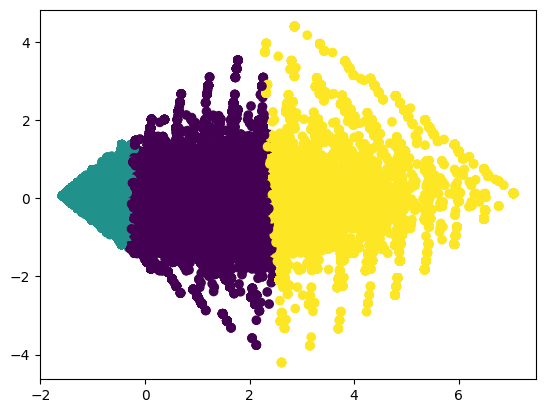

In [18]:
# 可视化
plt.scatter(df_reviewer_matrix_2[:, 0], df_reviewer_matrix_2[:, 1], c=kmeans.labels_)
plt.show()

In [15]:
# 查看每个类别的数量
df_reviewer['cluster'] = kmeans.labels_
df_reviewer['cluster'].value_counts()

cluster
0    157176
1    106315
2     30558
Name: count, dtype: int64

In [16]:
df_reviewer

,Rating,Score_taste,Score_environment,Score_service,cluster
Reviewer,,,,,
!Mrlei..,5.000000,4.000000,4.000000,4.000000,0
!i!_1163,5.000000,4.000000,4.000000,4.000000,0
!i_3650,5.000000,1.000000,4.000000,4.000000,1
!o_o!,5.000000,4.000000,4.000000,4.000000,0
!syao,3.888889,3.000000,2.666667,2.888889,1
...,...,...,...,...,...
￥小圆圆,5.000000,3.000000,4.000000,4.000000,0
￥我（来）也￥,5.000000,4.000000,3.000000,3.000000,0
￥老牛￥,2.000000,2.000000,3.000000,1.000000,2


In [17]:
# df_reviewer和df_reviewer_value通过Reviewer列进行join
df_reviewer_value_count=pd.merge(df_reviewer,df_reviewer_value,on='Reviewer')
df_reviewer_value_count

,Rating,Score_taste,Score_environment,Score_service,cluster,Reviewer_value,Reviewer_rank
Reviewer,,,,,,,
!Mrlei..,5.000000,4.000000,4.000000,4.000000,0,0,0
!i!_1163,5.000000,4.000000,4.000000,4.000000,0,0,0
!i_3650,5.000000,1.000000,4.000000,4.000000,1,3,1
!o_o!,5.000000,4.000000,4.000000,4.000000,0,2,0
!syao,3.888889,3.000000,2.666667,2.888889,1,7,1
...,...,...,...,...,...,...,...
￥小圆圆,5.000000,3.000000,4.000000,4.000000,0,4,0
￥我（来）也￥,5.000000,4.000000,3.000000,3.000000,0,0,0
￥老牛￥,2.000000,2.000000,3.000000,1.000000,2,0,0


In [19]:
# 将df_reviewer_value_count导出成csv文件
df_reviewer_value_count.to_csv('df_reviewer_value_count.csv')

In [18]:
# 汇总每个cluster的平均Reviewer_value和平均Reviewer_rank
df_reviewer_value_count.groupby('cluster')[['Rating', 'Score_taste', 'Score_environment', 'Score_service','Reviewer_value','Reviewer_rank']].mean()

,Rating,Score_taste,Score_environment,Score_service,Reviewer_value,Reviewer_rank
cluster,,,,,,
0,4.896241,3.909815,3.882360,3.836269,1.156404,0.076577
1,3.920761,2.992021,2.931740,2.704157,1.772986,0.146781
2,2.318936,1.547270,1.643683,1.127427,1.286799,0.076510
